## Portfolio Assignment week 04

This first week of the *supervised* part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of *gradient descent* by hand. Later, we will off course just use [sklearn SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html) for this.

Load [the data for this exercise](../Data/housing-data.txt). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes. 

1. Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis). 

As we have discussed, the general formula for the cost of a model is as follows:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$

2. Write a function `compute_cost` that receives a matrix `X` (of size $m \times n$), a vector `y` (of size $n \times 1$) and a vector `theta` (of size $n+1 \times 1$) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original `X`-matrix

When we call `compute-cost` with a value of `theta` of `[0,0]`, the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize $J(\theta)$. 

As we have discussed, the technique we are using for this is *gradient descent*: every step of this descent, we update the values of `theta` as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

3. Make a function `gradient_descent`, that receives the matrix `X`, the vectors `y` and `theta`, the learning curve `alpha` and a `num_iters`. In this method, performs `num_iters` steps of the gradient descent, calculating the cost $J(\theta)$ every step and storing that in a list. After the `num_iters`, this function needs to return the found value of `theta` and the list of all the costs.

4. Create a plot of the values of $J(\theta)$ that `compute_costs` has found. Do you see a decrease in the total costs?




#### 1.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
data = pd.read_csv('housing-data.txt')

In [29]:
data.head()

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


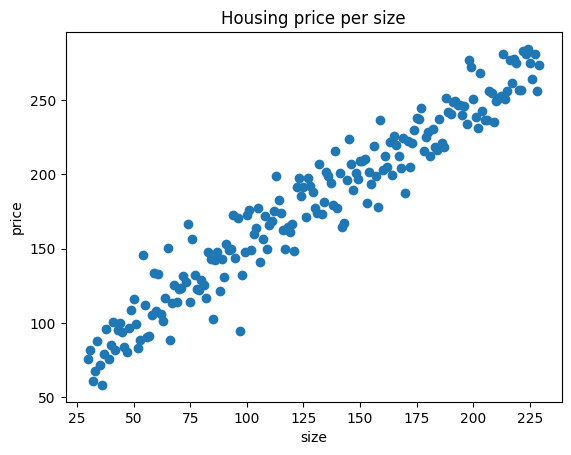

In [30]:
plt.scatter(data['size'], data['price'])
plt.xlabel('size')
plt.ylabel('price')
plt.title('Housing price per size')
plt.show()

There seems to be indeed a linear relationship

#### 2.

In [31]:
def compute_cost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    difference = (h - y)**2
    cost = np.sum(difference)
    J = (1/(2 * m)) * cost
    return J

In [34]:
data = data.to_numpy()
m, n = data.shape

X = np.c_[np.ones(m), data[:, [0]]]
y = data[:, [1]]

# returns an array of zeros
theta = np.zeros((2,1))

In [35]:
print(f'The cost is {compute_cost(X,y, theta):.4f}')

The cost is 17840.7810


3.

In [36]:
alpha = 0.00001
num_iterations = 15
theta = np.zeros((1,2))

def gradient_descent(X, y, theta, alpha, num_iterationss):
    costs_list = []
    # for the amount of iterations
    # _ because it does not matter what is put in there
    for _ in range(num_iterations):
        m = len(y)

        #make prediction of h and the error
        h = np.dot(X, theta.T)
        error = h - y

        #calculate the difference and gradient
        difference = np.dot(X.T,(error)) / m
        gradient = alpha * difference.T

        #update the theta
        theta = theta - gradient
        
        #append the costs to list
        costs_list.append(compute_cost(X, y, theta.T))
        
        
 
    return theta, costs_list

In [37]:
theta, costs = gradient_descent(X, y, theta, alpha , num_iterations)

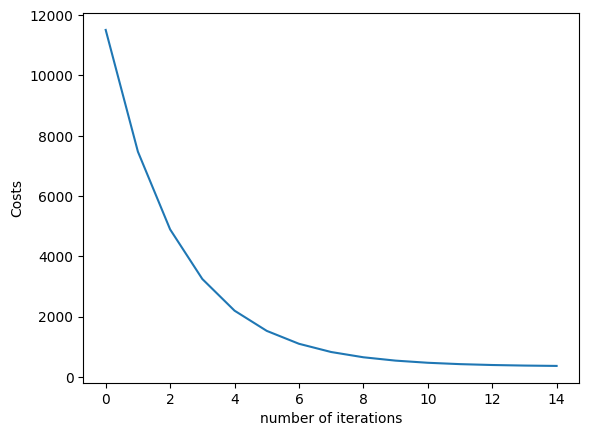

In [40]:
plt.plot(costs)
plt.ylabel('Costs')
plt.xlabel('number of iterations')
plt.show()